# 1. Tensor

> PyTorch 공식 홈페이지의 official documentation, official tutorial 참고
https://pytorch.org/docs/stable/index.html

## 1.1 Why Torch?
- 많이 사용한다.
- 사용이 직관적이고 쉽다. (torch tensor ~ numpy array)

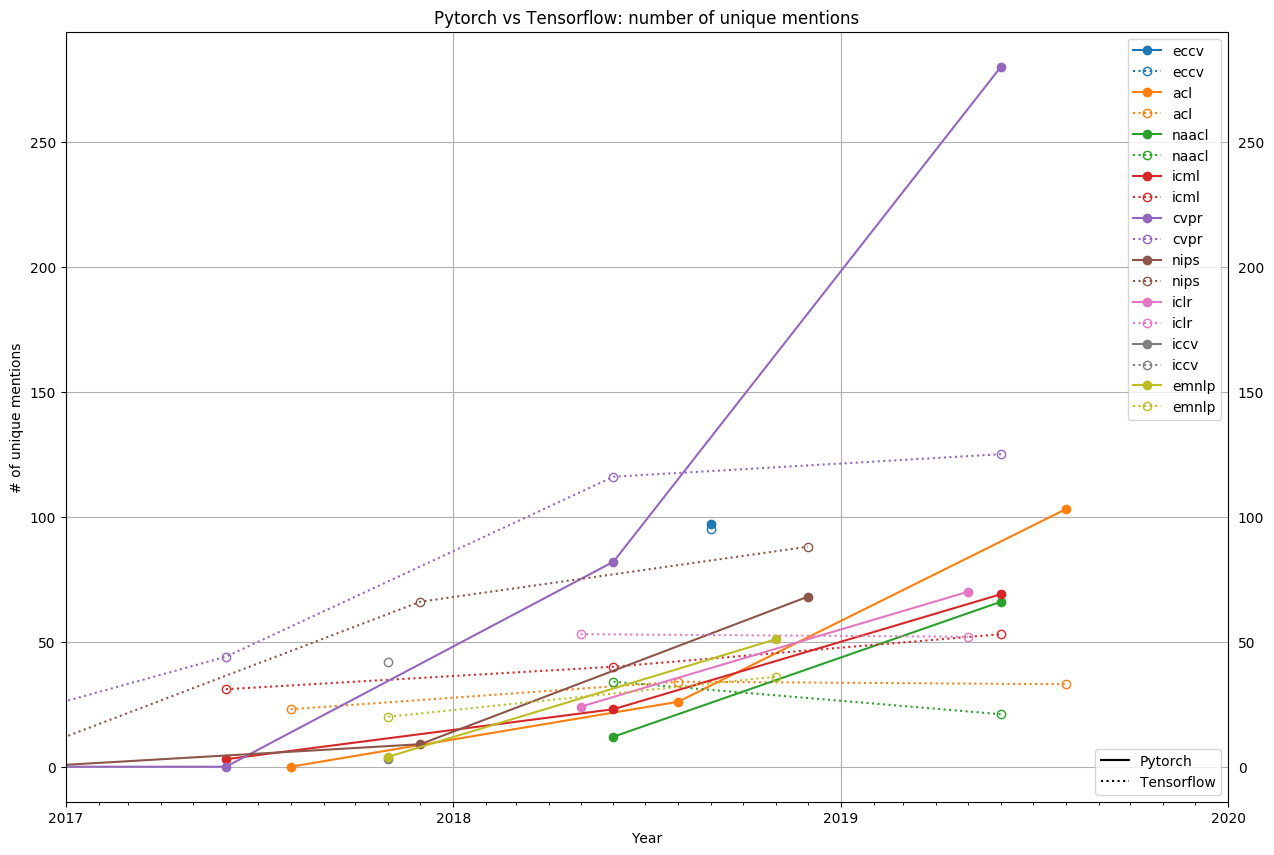

In [ ]:
# Torch : The torch package contains data structures for multi-dimensional tensors and mathmatical 
#         operations over these are defined.

## 1.2 Torch Basics

- Numpy를 대체하면서 GPU를 이용한 연산이 필요한 경우  
    (DNN w/ plain Numpy:  
    https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795)
- 최대한의 유용성과 속도를 제공하는 딥러닝 연구 플랫폼이 필요한 경우

- torch : main namespace, 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조
- torch.autograd : 자동 미분을 위한 함수들
- torch.nn : 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 emd(Conv2d, ReLU, BCELoss, ...)
- torch.nn.functional : .nn은 클래스, .functional은 함수
- torch.optim : parameter optimizer 알고리즘 모음(SGD, Adam, ...)
- torch.utils : DataLoader, Trainer 및 기타 유틸리티 기능
- torch.utils.data : optimizer의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수
- torch.multiprocessing : multiprocessing 지원 및 프로세스 전반에 걸쳐 유용한 기능들 제공

- torch와 numpy 비교 (numpy.ndarray, torch.Tensor)
- torch는 보통 약자를 많이 쓰지 않는다. 아마 nn, F 등을 쓰기 때문?  
- 습관적으로 torch version check, cuda check

### torch.cuda

In [ ]:
!nvidia-smi

In [ ]:
import torch
import numpy as np

print(torch.__version__)

> 원하는 버전이 아닐시에는 공식 홈페이지를 참고해 다운로드  
(https://pytorch.org/get-started/locally/)

In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name())

### torch vs numpy

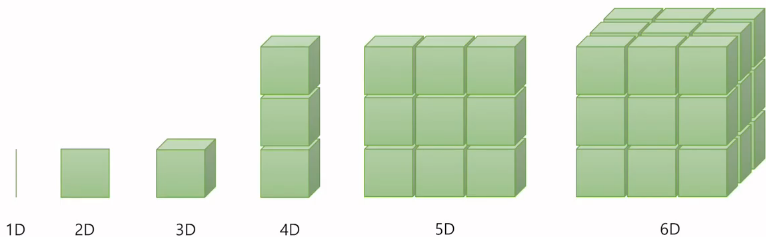

딥러닝에서 다루게 되는 대상(데이터, 객체, ...)의 가장 기본적인 단위는 벡터, 행렬, 텐서 (선형대수)  
엄밀하게는 0D: scalar, 1D: vector, 2D: matrix, over 3D: tensor 이지만 data science에서는 scalar를 제외하고 모두 1차원 텐서, 2차원 텐서, 3차원 텐서 등으로 부른다.

**numpy**

In [ ]:
arr = np.array([0., 1., 2., 3., 4., 5., 6.])
# arr = np.array(range(7), dtype=float)
arr

In [ ]:
print('Rank of arr: ', arr.ndim)
print('Shape of arr: ', arr.shape)

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
# arr = np.array(range(1, 13), dtype=float).reshape((4, 3))
arr

In [ ]:
print('Rank of arr: ', arr.ndim)
print('Shape of arr: ', arr.shape)

In [ ]:
arr[1:3]
arr[:, :-1]

**torch**

In [ ]:
tens = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
# tens = torch.FloatTensor(range(7))
tens

In [ ]:
print(tens.dim())
print(tens.shape)
print(tens.size())

In [ ]:
tens = torch.FloatTensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])

tens

In [ ]:
print(tens.dim())
print(tens.size())

In [ ]:
tens[1:3]
tens[:, :-1]

- torch.empty() : 빈 tensor
- torch.ones()  : 1로 채워진 tensor
- torch.zeros() : 0으로 채워진 tensor
- torch.rand() : random으로 채워진 tensor (defualt range : 0~1)

In [ ]:
print(type(np.empty([5, 4])))
print(type(torch.empty(5, 4)))

In [ ]:
# np.empty([5, 4])
# torch.empty([5, 4])
torch.empty(5, 4)

In [ ]:
# np.ones([3, 3])
torch.ones(3, 3)

In [ ]:
# np.zeros(2)
# np.zeros([2])
torch.zeros(2)

In [ ]:
# np.random.rand(5, 6)
torch.rand(5, 6)

In [ ]:
# np.shape(np.random.rand(5, 6))
# np.random.rand(5, 6).shape
# np.shape(torch.rand(5, 6))
torch.rand(5, 6).size()

- torch.tensor() : type casting

In [ ]:
lst = [12, 3]
arr = np.array([2, 4, 5])

In [ ]:
torch.tensor(lst)

In [ ]:
torch.tensor(arr)

In [ ]:
tns = torch.tensor([1, 2, 3])
tns.numpy()

- operations
- add_() <- inplace 함수

In [ ]:
x = torch.ones(2, 2)
y = torch.ones(2, 2)   
print(x)
print(y)

In [ ]:
x+y

In [ ]:
torch.add(x, y)

In [ ]:
y.add(x)

In [ ]:
y

In [ ]:
y.add_(x)

In [ ]:
y

In [ ]:
t1 = torch.FloatTensor([[1, 2], [3, 4]])
t2 = torch.FloatTensor([[1], [2]])
print('Shape of t1: ', t1.shape) # 2 x 2
print('Shape of t2: ', t2.shape) # 2 x 1
print(t1.matmul(t2)) # 2 x 1

In [ ]:
t1 = torch.FloatTensor([[1, 2], [3, 4]])
t2 = torch.FloatTensor([[1], [2]])
print('Shape of t1: ', t1.shape) # 2 x 2
print('Shape of t2: ', t2.shape) # 2 x 1
print(t1 * t2) # 2 x 2
print(t1.mul(t2))

In [ ]:
t = torch.FloatTensor([1, 2])
print(t.mean())

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

In [ ]:
print(t.sum()) # 원소 전체의 덧셈
print(t.sum(dim=0)) # 행 제거
print(t.sum(dim=1)) # 열 제거
print(t.sum(dim=-1))

In [ ]:
print(t.max())
print(t.max(dim=0))

In [ ]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

In [ ]:
print(t.max(dim=1))
print(t.max(dim=-1))

**Broadcasting**

In [ ]:
t1 = torch.FloatTensor([[3, 3]])
t2 = torch.FloatTensor([[2, 2]])
print(t1 + t2)

In [ ]:
# Vector + scalar
t1 = torch.FloatTensor([[1, 2]])
t2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(t1 + t2)

In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
t1 = torch.FloatTensor([[1, 2]])
t2 = torch.FloatTensor([[3], [4]])
print(t1 + t2)

**Size converting: view**
- view 함수에서 나머지 argument 채우고 하나만 -1을 사용하면 알아서 맞춰줌

In [ ]:
data = torch.rand(8, 8)
print(data)

In [ ]:
data.view(64)

In [ ]:
data.view(4, 16)

In [ ]:
data.view(-1, 16)

In [ ]:
arr = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
t = torch.FloatTensor(arr)
print(t)
print(t.shape)

In [ ]:
print(t.view([-1, 3]))
print(t.view([-1, 3]).shape)

In [ ]:
print(t.view([-1, 1, 3]))
print(t.view([-1, 1, 3]).shape)

**Squeeze, Unsqueeze**

In [ ]:
t = torch.FloatTensor([[0], [1], [2]])
print(t)
print(t.shape)

In [ ]:
print(t.squeeze())
print(t.squeeze().shape)

In [ ]:
t = torch.Tensor([0, 1, 2])
print(t.shape)

In [ ]:
print(t.unsqueeze(0))
print(t.unsqueeze(0).shape)

In [ ]:
print(t.view(1, -1))
print(t.view(1, -1).shape)

In [ ]:
print(t.unsqueeze(1))
print(t.unsqueeze(1).shape)
print(t.unsqueeze(-1))
print(t.unsqueeze(-1).shape)

**Type Casting**

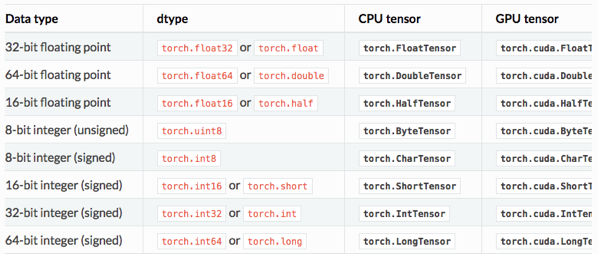

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print(lt.float())

In [ ]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

**Concatenate, Stack**

In [ ]:
t1 = torch.FloatTensor([[1, 2], [3, 4]])
t2 = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
print(torch.cat([t1, t2], dim=0))
print(torch.cat([t1, t2], dim=1))

In [ ]:
t1 = torch.FloatTensor([1, 4])
t2 = torch.FloatTensor([2, 5])
t3 = torch.FloatTensor([3, 6])

In [ ]:
print(torch.stack([t1, t2, t3]))

In [ ]:
print(torch.cat([t1, t2, t3]))

In [ ]:
print(torch.cat([t1.unsqueeze(0), t2.unsqueeze(0), t3.unsqueeze(0)], dim=0))

In [ ]:
print(torch.stack([t1, t2, t3], dim=1))

- ones_like, zeros_like

In [ ]:
t = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(t)

In [ ]:
print(torch.ones_like(t))
print(torch.zeros_like(t))

- tensor가 scalar 일 때 .item() 사용해 실수값으로 받을 수 있음

In [ ]:
scalar = torch.ones(1)
print(scalar)

In [ ]:
scalar.item()